In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
%load_ext autoreload
%autoreload 2
from ieee80211phy.transmitter.main import *
from ieee80211phy.receiver.packet_detector import *
from ieee80211phy.receiver.frequency_correction import *
from ieee80211phy.receiver.timing_acqusition import *
from ieee80211phy.util import *
import scipy as sp

import warnings
warnings.filterwarnings('ignore') # yolo!

# TX packet

In [18]:
19000 * (1/20e6)

0.00095

In [23]:
28000 * (1/20e6)

0.0014

In [38]:
length_bytes = 4095

In [39]:

bin(length_bytes)[2:].zfill(12)[::-1]

'111111111111'

INFO:tx:Packing 4095 bytes
INFO:tx:228 symbols. 50 padding bits added


111111111111 12


<IPython.core.display.Javascript object>


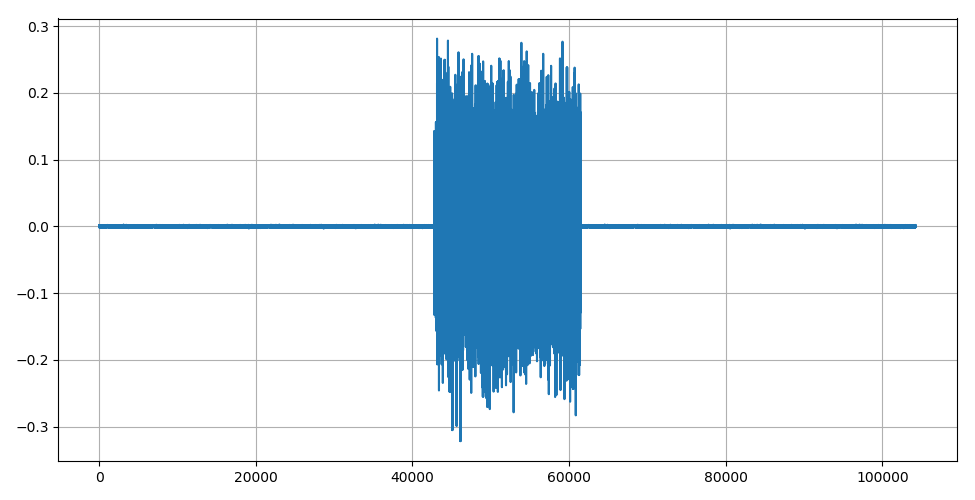

DEBUG:matplotlib.axes._base:update_title_pos


In [51]:
np.random.seed(0)
input = '0x0402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B60402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E736972656420776520747265'
input = flip_byte_endian(hex_to_bitstr(input))
tx = build_package(input, data_rate=36)

pad_len = 42800
noise = 0.001 *  (0.70711 * np.random.randn(pad_len) + 0.70711 * np.random.randn(pad_len)*1j)
tx = np.concatenate([noise, tx, noise])

plt.figure(figsize=(9.75,5))
plt.plot(tx)
plt.tight_layout()
plt.grid()

<IPython.core.display.Javascript object>


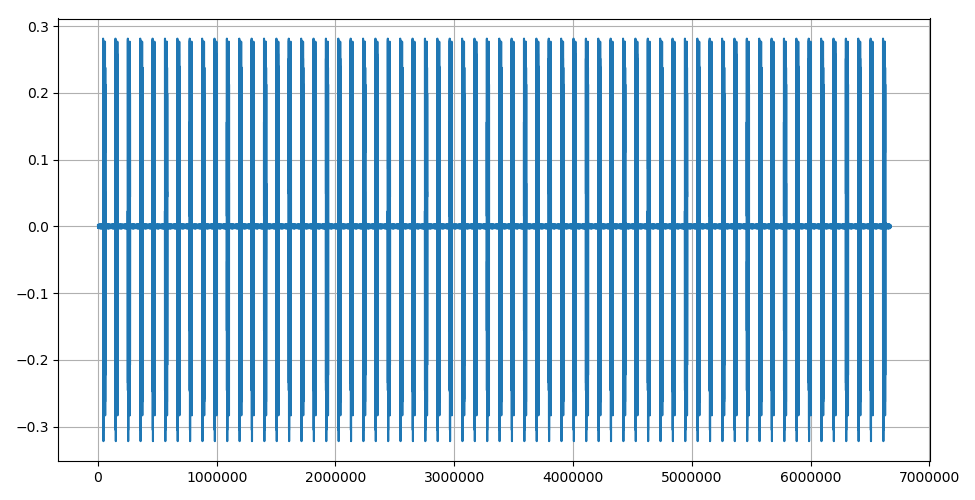

DEBUG:matplotlib.axes._base:update_title_pos


In [48]:
to_tx = np.array(tx.tolist() * 64)
# to_tx = awgn(to_tx, 16)
# to_tx = timing_offseset(to_tx, 0.00004)
# to_tx = mixer(to_tx, 10e3, 20e6)

def save_complex64_file(file: str, iq: np.array):
    out = iq.astype(sp.complex64)
    out.tofile(file)
    return

save_complex64_file('tx_long.raw', to_tx)
plt.figure(figsize=(9.75,5))
plt.plot(to_tx)
plt.tight_layout()
plt.grid()

In [18]:

def load_complex64_file(file: str):
    f = scipy.fromfile(open(file), dtype=scipy.complex64)
    return f

f = load_complex64_file('/home/gaspar/gnu_wifi_out')

<IPython.core.display.Javascript object>


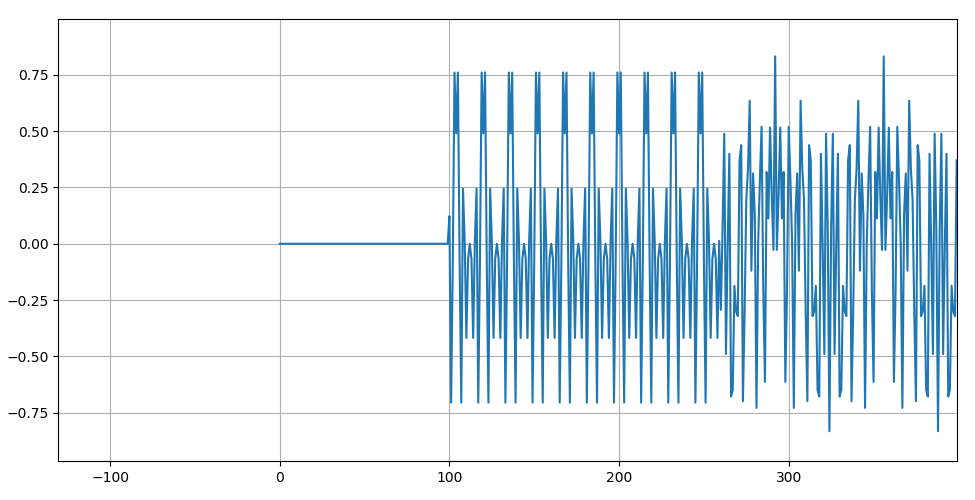

In [19]:
plt.figure(figsize=(9.75,5))
plt.plot(f)
plt.tight_layout()
plt.grid()